In [77]:
# Add relevant Jupyter notebook extensions
def clearvars():    
    for el in sorted(globals()):
        if '__' not in el:
                print(f'deleted: {el}')
                del el
clearvars()

deleted: ClosedLoop
deleted: In
deleted: Kd
deleted: Kd_Op
deleted: Kp
deleted: Kp_Op
deleted: Mission
deleted: Out
deleted: Submarine
deleted: Trajectory
deleted: _
deleted: _dh
deleted: _i
deleted: _i1
deleted: _i10
deleted: _i11
deleted: _i12
deleted: _i13
deleted: _i14
deleted: _i15
deleted: _i16
deleted: _i17
deleted: _i18
deleted: _i19
deleted: _i2
deleted: _i20
deleted: _i21
deleted: _i22
deleted: _i23
deleted: _i24
deleted: _i25
deleted: _i26
deleted: _i27
deleted: _i28
deleted: _i29
deleted: _i3
deleted: _i30
deleted: _i31
deleted: _i32
deleted: _i33
deleted: _i34
deleted: _i35
deleted: _i36
deleted: _i37
deleted: _i38
deleted: _i39
deleted: _i4
deleted: _i40
deleted: _i41
deleted: _i42
deleted: _i43
deleted: _i44
deleted: _i45
deleted: _i46
deleted: _i47
deleted: _i48
deleted: _i49
deleted: _i5
deleted: _i50
deleted: _i51
deleted: _i52
deleted: _i53
deleted: _i54
deleted: _i55
deleted: _i56
deleted: _i57
deleted: _i58
deleted: _i59
deleted: _i6
deleted: _i60
deleted: _i61
del

In [78]:
# You can double-check your Python path like this...

import sys  


# Adds the B1-CODING-PRACTICAL-MT24 directory to the Python path
for i in range (0,10):
    print(i)



0
1
2
3
4
5
6
7
8
9


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

arr


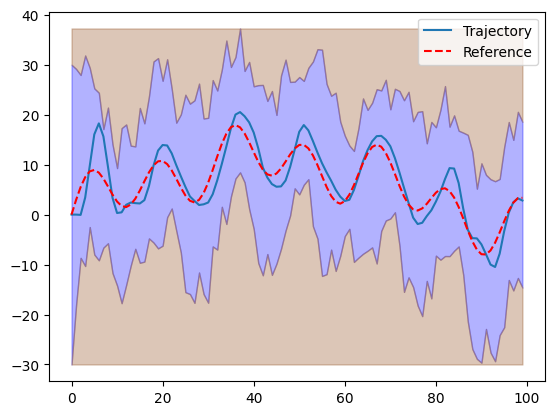

In [79]:
# Import relevant modules
import os
sys.path.append(os.path.abspath('..'))
from uuv_mission.dynamic import *
from uuv_mission.terrain import *
from uuv_mission.control import *
sub = Submarine()
mycontroller = controller(0.15,0.65)
# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub,mycontroller)
mission = Mission.from_csv(r"C:\Users\benji\OneDrive - Nexus365\Catz Engineering\year 3\Standard\B1\code\python\b1-coding-practical-mt24\data\mission.csv")


trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

###print(len(trajectory.position[:,1]))
#print(len(mission.reference)) #same length 

arr
0.146 0.635


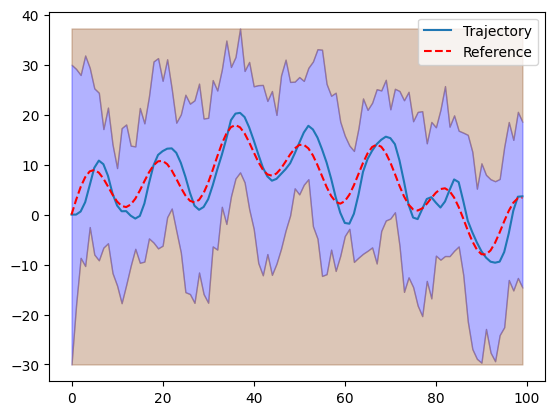

In [80]:
sub = Submarine()
# Instantiate your controller (depending on your implementation)
n = 10 #size of space looking in 
step_size = 0.005 
mission1 = Mission.from_csv(r"C:\Users\benji\OneDrive - Nexus365\Catz Engineering\year 3\Standard\B1\code\python\b1-coding-practical-mt24\data\mission.csv")

error_results = np.zeros(n*n) #format i*10+j index
for i in range(0,n):
    for j in range(0,n):
        finalerror = 0;
        for av in range(0,5):
            sub = Submarine()
            mycontroller = controller(0.15+((i-n/2)*step_size),0.65+((j-n/2)*step_size))
            closed_loop = ClosedLoop(sub,mycontroller)
            trajectory = closed_loop.simulate_with_random_disturbances(mission1)
            finalerror += mycontroller.get_total_error()
        
        error_results[i*10+j] += finalerror/5
    
min_error = np.min(error_results)
min_index = np.argmin(error_results)
old_i = min_index/n
old_j = min_index%n
Kp_Op = 0.15+(old_i-n/2)*step_size
Kd_Op = 0.65+(old_j-n/2)*step_size

print((Kp_Op),Kd_Op)

#final test to see if its better. 
sub = Submarine()
mycontroller = controller(Kp_Op,Kd_Op)
# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub,mycontroller)
trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

    
    
